In [172]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [90]:
# parameters
N=50 #Hilbert space dim
alpha=3 #coherent state amplitude


In [149]:
# States

fock0_dm = dq.fock_dm(N, 0)
fock1 = dq.fock(N, 1)
coh = dq.coherent(N, alpha)
cat = (dq.coherent(N, alpha) + dq.coherent(N, -alpha)) / np.sqrt(2)
cat4 = (dq.coherent(N, alpha) + dq.coherent(N, -alpha) + dq.coherent(N, 1j*alpha) + dq.coherent(N, -1j*alpha)) / 2
def cat_factory(n):
    cat_n = dq.coherent(N, alpha)
    for i in range(1,n):
        cat_n += dq.coherent(N, np.exp(1j*2*i*np.pi/n)*alpha)

    
    return cat_n / cat_n.norm()




In [150]:
fock0_dm

QArray: shape=(50, 50), dims=(50,), dtype=complex64, layout=dense
[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]

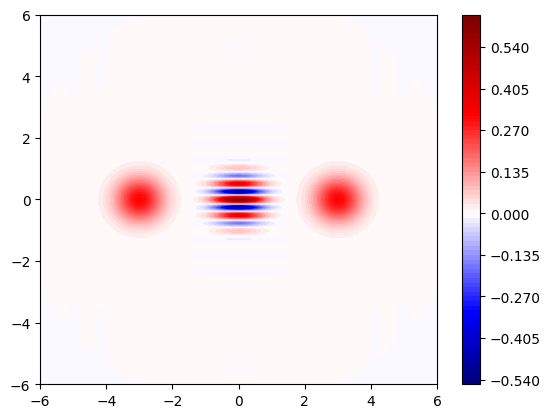

In [187]:
# cat state wigner
# wigner = dq.wigner(cat_factory(2))
wigner = dq.wigner(cat_factory(2))
plt.contourf(wigner[0], wigner[1],wigner[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
plt.colorbar()

In [ ]:
with open("../../data/synthetic/noisy_wigner_5.pickle", 'rb') as f:
    state = pickle.load(f)
wigner = dq.wigner(state, xmax=6, ymax=6)
plt.contourf(wigner[0], wigner[1],wigner[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
plt.colorbar()

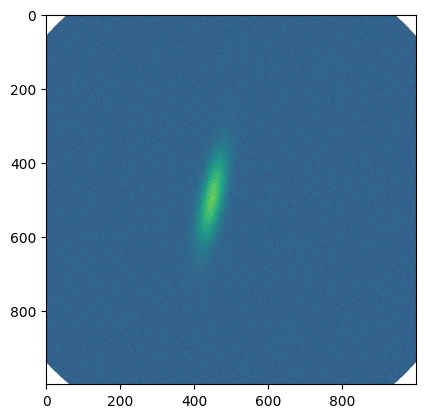

In [193]:
plt.imshow(state[2])

TypeError: Image data of dtype complex64 cannot be converted to float

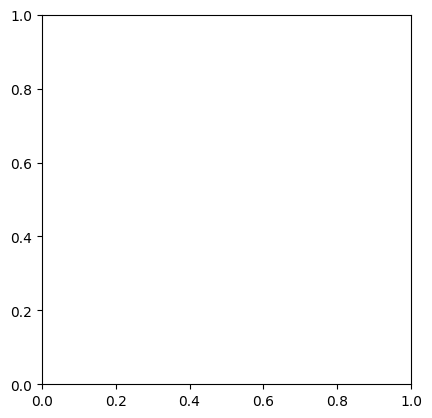

In [184]:
plt.imshow(state)
plt.colorbar()

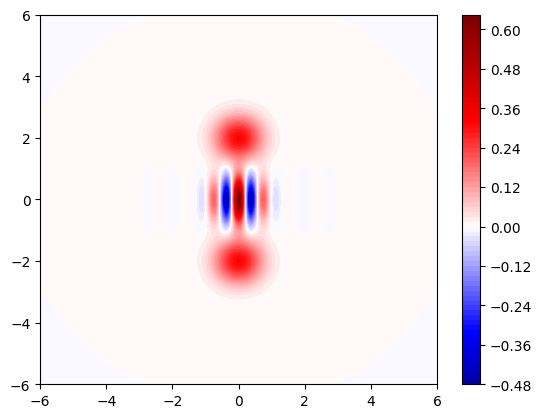

In [179]:
# Fock state wigner
# state = dq.fock(N, 1)
state = 1/jnp.sqrt(2)*(dq.coherent(N, 2)+dq.coherent(N, -2))
wigner = dq.wigner(state)
plt.contourf(wigner[0], wigner[1],wigner[2], levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
plt.colorbar()

In [1]:
N = 20

def cat_factory(n, alpha=1):
    cat_n = dq.coherent(N, alpha)
    for i in range(1,n):
        cat_n += dq.coherent(N, np.exp(1j*2*i*np.pi/n)*alpha)
    
    return cat_n / cat_n.norm()

def cat_dm_factory(n, alpha=1):
    return cat_factory(n, alpha=alpha).todm()

def plot_wigner(xvals, yvals, wigner_values):
    plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def plot_wigner_fct(wigner_fct):
    plt.contourf(wigner_fct[0], wigner_fct[1], wigner_fct[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def load_wigner(file):
    with open(file, 'rb') as f:
        wigner_fct = pickle.load(f)
    return wigner_fct

In [2]:
import pickle
data_dir = "../../data/synthetic/quantum_state_5.pickle"

with open("../../data/synthetic/quantum_state_5.pickle", 'rb') as f:
        wigner_fct = pickle.load(f)

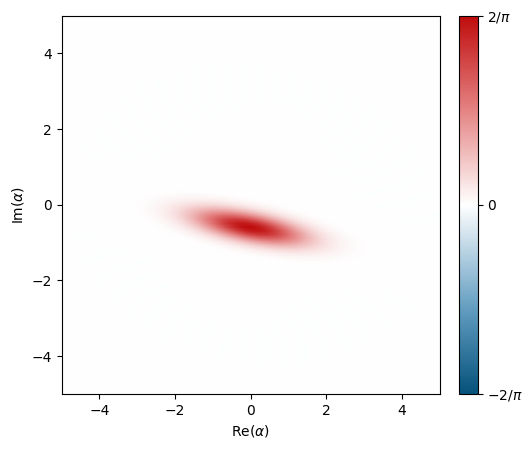

In [5]:
import dynamiqs as dq
dq.plot.wigner(wigner_fct)